# 🔬 MR Channel Selection for NPZ Generation

This notebook creates separate NPZ files using individual channels from the MR latent data.
We'll generate two datasets:
- Dataset 1: Using MR Channel 1 only
- Dataset 2: Using MR Channel 2 only

This allows us to test the 3D pix2pix model with single-channel input (--input_nc 1) using different MR channel information.

## 📦 Import Libraries and Setup

In [10]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
import pickle
from pathlib import Path

print("✅ Libraries imported successfully")
print(f"📍 Working directory: {os.getcwd()}")

✅ Libraries imported successfully
📍 Working directory: /Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/Inspection


## 📁 File Paths and Configuration

In [11]:
# Input files
mr_latent_file = "/Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/datasets/overfit/1ABA009_latent_mr.nii"
ct_normalized_file = "/Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/datasets/overfit/CT_normalised_latent.mha"

# Output directories - Fixed to save in ../datasets/
base_output_dir = "../datasets"
channel1_dir = os.path.join(base_output_dir, "channel1_only")
channel2_dir = os.path.join(base_output_dir, "channel2_only")

# Create output directories
os.makedirs(channel1_dir, exist_ok=True)
os.makedirs(channel2_dir, exist_ok=True)

print(f"📂 Input MR file: {mr_latent_file}")
print(f"📂 Input CT file: {ct_normalized_file}")
print(f"📂 Channel 1 output: {channel1_dir}")
print(f"📂 Channel 2 output: {channel2_dir}")

# Check if files exist
if os.path.exists(mr_latent_file):
    print(f"✅ MR file found: {mr_latent_file}")
else:
    print(f"❌ MR file not found: {mr_latent_file}")
    
if os.path.exists(ct_normalized_file):
    print(f"✅ CT file found: {ct_normalized_file}")
else:
    print(f"❌ CT file not found: {ct_normalized_file}")

📂 Input MR file: /Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/datasets/overfit/1ABA009_latent_mr.nii
📂 Input CT file: /Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/datasets/overfit/CT_normalised_latent.mha
📂 Channel 1 output: ../datasets/channel1_only
📂 Channel 2 output: ../datasets/channel2_only
✅ MR file found: /Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/datasets/overfit/1ABA009_latent_mr.nii
✅ CT file found: /Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/datasets/overfit/CT_normalised_latent.mha


## 📊 Load and Analyze MR Data

In [12]:
# Load MR latent data
mr_image = sitk.ReadImage(mr_latent_file)
mr_array = sitk.GetArrayFromImage(mr_image)  # Shape: (depth, height, width, channels)

print(f"📋 MR Latent Data:")
print(f"   Shape: {mr_array.shape}")
print(f"   Data type: {mr_array.dtype}")
print(f"   Channels: {mr_array.shape[-1]}")
print()

# Analyze each channel
print("📊 Channel Analysis:")
for channel in range(mr_array.shape[-1]):
    channel_data = mr_array[:, :, :, channel]
    non_zero_count = np.count_nonzero(channel_data)
    coverage = 100 * non_zero_count / channel_data.size
    
    print(f"   Channel {channel}:")
    print(f"     Range: [{channel_data.min():.4f}, {channel_data.max():.4f}]")
    print(f"     Mean: {channel_data.mean():.4f}")
    print(f"     Std: {channel_data.std():.4f}")
    print(f"     Coverage: {coverage:.1f}% ({non_zero_count:,}/{channel_data.size:,} voxels)")
    print()

📋 MR Latent Data:
   Shape: (32, 128, 128, 4)
   Data type: float32
   Channels: 4

📊 Channel Analysis:
   Channel 0:
     Range: [-4.1304, 4.1969]
     Mean: -0.2290
     Std: 0.5040
     Coverage: 100.0% (524,287/524,288 voxels)

   Channel 1:
     Range: [-0.4932, 0.6218]
     Mean: -0.2423
     Std: 0.2186
     Coverage: 100.0% (524,288/524,288 voxels)

   Channel 2:
     Range: [-4.1691, 4.0033]
     Mean: -0.1637
     Std: 0.4370
     Coverage: 100.0% (524,286/524,288 voxels)

   Channel 3:
     Range: [-3.5221, 4.8468]
     Mean: -0.0352
     Std: 0.4285
     Coverage: 100.0% (524,286/524,288 voxels)



## 📊 Load CT Data

In [13]:
# Load normalized CT data
ct_image = sitk.ReadImage(ct_normalized_file)
ct_array = sitk.GetArrayFromImage(ct_image)  # Shape: (depth, height, width)

print(f"📋 CT Normalized Data:")
print(f"   Shape: {ct_array.shape}")
print(f"   Data type: {ct_array.dtype}")
print(f"   Range: [{ct_array.min():.4f}, {ct_array.max():.4f}]")
print(f"   Mean: {ct_array.mean():.4f}")
print(f"   Std: {ct_array.std():.4f}")

# Check dimensional compatibility
print(f"\n🔍 Dimensional Check:")
mr_spatial = mr_array.shape[:3]  # (depth, height, width)
ct_spatial = ct_array.shape[:3]   # (depth, height, width)

if mr_spatial == ct_spatial:
    print(f"✅ Spatial dimensions match: {mr_spatial}")
else:
    print(f"❌ Spatial dimensions mismatch:")
    print(f"   MR: {mr_spatial}")
    print(f"   CT: {ct_spatial}")

📋 CT Normalized Data:
   Shape: (32, 128, 128)
   Data type: float32
   Range: [-1.0000, 1.0000]
   Mean: -0.7623
   Std: 0.3784

🔍 Dimensional Check:
✅ Spatial dimensions match: (32, 128, 128)


## 🎯 Visualize Target Channels

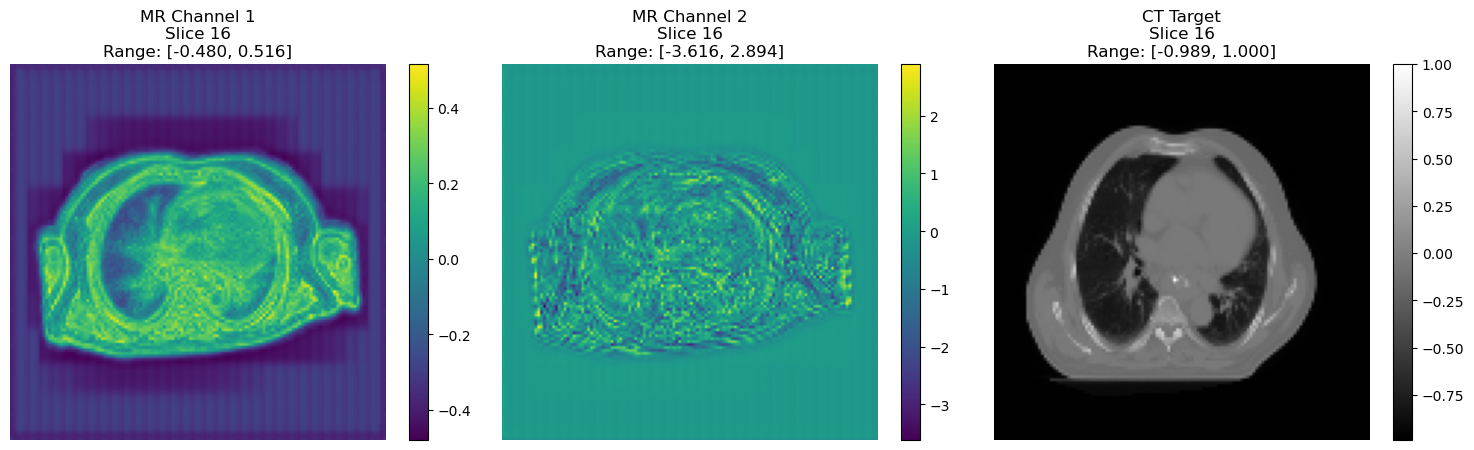

In [14]:
# Visualize channels 1 and 2 that we'll extract
middle_slice = mr_array.shape[0] // 2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Channel 1
channel1_slice = mr_array[middle_slice, :, :, 1]
im1 = axes[0].imshow(channel1_slice, cmap='viridis', aspect='equal')
axes[0].set_title(f'MR Channel 1\nSlice {middle_slice}\nRange: [{channel1_slice.min():.3f}, {channel1_slice.max():.3f}]')
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], shrink=0.8)

# Channel 2
channel2_slice = mr_array[middle_slice, :, :, 2]
im2 = axes[1].imshow(channel2_slice, cmap='viridis', aspect='equal')
axes[1].set_title(f'MR Channel 2\nSlice {middle_slice}\nRange: [{channel2_slice.min():.3f}, {channel2_slice.max():.3f}]')
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

# CT for reference
ct_slice = ct_array[middle_slice, :, :]
im3 = axes[2].imshow(ct_slice, cmap='gray', aspect='equal')
axes[2].set_title(f'CT Target\nSlice {middle_slice}\nRange: [{ct_slice.min():.3f}, {ct_slice.max():.3f}]')
axes[2].axis('off')
plt.colorbar(im3, ax=axes[2], shrink=0.8)

plt.tight_layout()
plt.show()

## 🔧 Extract Single Channels

In [15]:
# Extract individual channels
mr_channel1 = mr_array[:, :, :, 1]  # Extract channel 1
mr_channel2 = mr_array[:, :, :, 2]  # Extract channel 2

print(f"📊 Extracted Channels:")
print(f"   Channel 1 shape: {mr_channel1.shape}")
print(f"   Channel 2 shape: {mr_channel2.shape}")
print(f"   CT shape: {ct_array.shape}")
print()

# Add singleton channel dimension for compatibility
# Convert from (D, H, W) to (D, H, W, 1) for single-channel format
mr_channel1_4d = np.expand_dims(mr_channel1, axis=-1)
mr_channel2_4d = np.expand_dims(mr_channel2, axis=-1)

print(f"📊 4D Format (with channel dimension):")
print(f"   Channel 1 shape: {mr_channel1_4d.shape}")
print(f"   Channel 2 shape: {mr_channel2_4d.shape}")
print()

# Verify data integrity
print(f"🔍 Data Integrity Check:")
print(f"   Original channel 1 range: [{mr_array[:,:,:,1].min():.4f}, {mr_array[:,:,:,1].max():.4f}]")
print(f"   Extracted channel 1 range: [{mr_channel1.min():.4f}, {mr_channel1.max():.4f}]")
print(f"   Original channel 2 range: [{mr_array[:,:,:,2].min():.4f}, {mr_array[:,:,:,2].max():.4f}]")
print(f"   Extracted channel 2 range: [{mr_channel2.min():.4f}, {mr_channel2.max():.4f}]")
print(f"   ✅ Data extraction successful" if np.array_equal(mr_array[:,:,:,1], mr_channel1) else "❌ Data extraction failed")

📊 Extracted Channels:
   Channel 1 shape: (32, 128, 128)
   Channel 2 shape: (32, 128, 128)
   CT shape: (32, 128, 128)

📊 4D Format (with channel dimension):
   Channel 1 shape: (32, 128, 128, 1)
   Channel 2 shape: (32, 128, 128, 1)

🔍 Data Integrity Check:
   Original channel 1 range: [-0.4932, 0.6218]
   Extracted channel 1 range: [-0.4932, 0.6218]
   Original channel 2 range: [-4.1691, 4.0033]
   Extracted channel 2 range: [-4.1691, 4.0033]
   ✅ Data extraction successful


## 💾 Generate NPZ Files for Channel 1

In [16]:
# Subject ID - Extract from the actual input filename
input_filename = os.path.basename(mr_latent_file)  # "1ABA009_latent_mr.nii"
subject_id = input_filename.split('_')[0]  # "1ABA009"
print(f"📋 Using Subject ID: {subject_id}")

# Generate NPZ file for Channel 1
print(f"💾 Generating NPZ files for Channel 1...")

# NPZ file paths
mr_ch1_npz_path = os.path.join(channel1_dir, f"{subject_id}_mr_channel1.npz")
ct_ch1_npz_path = os.path.join(channel1_dir, f"{subject_id}_ct.npz")

# Save MR Channel 1 data
np.savez_compressed(mr_ch1_npz_path, data=mr_channel1_4d)
print(f"✅ Saved MR Channel 1: {mr_ch1_npz_path}")
print(f"   Shape: {mr_channel1_4d.shape}")
print(f"   Size: {os.path.getsize(mr_ch1_npz_path) / 1024 / 1024:.2f} MB")

# Save CT data (same for both channels)
np.savez_compressed(ct_ch1_npz_path, data=ct_array)
print(f"✅ Saved CT data: {ct_ch1_npz_path}")
print(f"   Shape: {ct_array.shape}")
print(f"   Size: {os.path.getsize(ct_ch1_npz_path) / 1024 / 1024:.2f} MB")

# Verify the saved data
test_mr_ch1 = np.load(mr_ch1_npz_path)['data']
test_ct_ch1 = np.load(ct_ch1_npz_path)['data']

print(f"\n🔍 Verification:")
print(f"   Loaded MR Channel 1 shape: {test_mr_ch1.shape}")
print(f"   Loaded CT shape: {test_ct_ch1.shape}")
print(f"   Data integrity: {'✅ OK' if np.array_equal(test_mr_ch1, mr_channel1_4d) else '❌ FAILED'}")

📋 Using Subject ID: 1ABA009
💾 Generating NPZ files for Channel 1...
✅ Saved MR Channel 1: ../datasets/channel1_only/1ABA009_mr_channel1.npz
   Shape: (32, 128, 128, 1)
   Size: 1.25 MB
✅ Saved CT data: ../datasets/channel1_only/1ABA009_ct.npz
   Shape: (32, 128, 128)
   Size: 0.32 MB

🔍 Verification:
   Loaded MR Channel 1 shape: (32, 128, 128, 1)
   Loaded CT shape: (32, 128, 128)
   Data integrity: ✅ OK


## 💾 Generate NPZ Files for Channel 2

In [17]:
# Generate NPZ file for Channel 2
print(f"💾 Generating NPZ files for Channel 2...")

# NPZ file paths
mr_ch2_npz_path = os.path.join(channel2_dir, f"{subject_id}_mr_channel2.npz")
ct_ch2_npz_path = os.path.join(channel2_dir, f"{subject_id}_ct.npz")

# Save MR Channel 2 data
np.savez_compressed(mr_ch2_npz_path, data=mr_channel2_4d)
print(f"✅ Saved MR Channel 2: {mr_ch2_npz_path}")
print(f"   Shape: {mr_channel2_4d.shape}")
print(f"   Size: {os.path.getsize(mr_ch2_npz_path) / 1024 / 1024:.2f} MB")

# Save CT data (same for both channels)
np.savez_compressed(ct_ch2_npz_path, data=ct_array)
print(f"✅ Saved CT data: {ct_ch2_npz_path}")
print(f"   Shape: {ct_array.shape}")
print(f"   Size: {os.path.getsize(ct_ch2_npz_path) / 1024 / 1024:.2f} MB")

# Verify the saved data
test_mr_ch2 = np.load(mr_ch2_npz_path)['data']
test_ct_ch2 = np.load(ct_ch2_npz_path)['data']

print(f"\n🔍 Verification:")
print(f"   Loaded MR Channel 2 shape: {test_mr_ch2.shape}")
print(f"   Loaded CT shape: {test_ct_ch2.shape}")
print(f"   Data integrity: {'✅ OK' if np.array_equal(test_mr_ch2, mr_channel2_4d) else '❌ FAILED'}")

💾 Generating NPZ files for Channel 2...
✅ Saved MR Channel 2: ../datasets/channel2_only/1ABA009_mr_channel2.npz
   Shape: (32, 128, 128, 1)
   Size: 1.32 MB
✅ Saved CT data: ../datasets/channel2_only/1ABA009_ct.npz
   Shape: (32, 128, 128)
   Size: 0.32 MB

🔍 Verification:
   Loaded MR Channel 2 shape: (32, 128, 128, 1)
   Loaded CT shape: (32, 128, 128)
   Data integrity: ✅ OK


## 📦 Create Crops.pkl Files

In [18]:
# Create crops.pkl for both datasets
# This contains metadata about the dataset structure

def create_crops_pkl(output_dir, mr_filename, ct_filename, channel_name):
    """Create crops.pkl file for the dataset"""
    
    crops_data = [
        {
            'name': subject_id,
            'mr_path': mr_filename,
            'ct_path': ct_filename,
            'bounds': [0, mr_channel1_4d.shape[0], 0, mr_channel1_4d.shape[1], 0, mr_channel1_4d.shape[2]],  # Full volume
            'channel': channel_name
        }
    ]
    
    crops_pkl_path = os.path.join(output_dir, 'crops.pkl')
    
    with open(crops_pkl_path, 'wb') as f:
        pickle.dump(crops_data, f)
    
    return crops_pkl_path, crops_data

# Create crops.pkl for Channel 1
crops_ch1_path, crops_ch1_data = create_crops_pkl(
    channel1_dir, 
    f"{subject_id}_mr_channel1.npz", 
    f"{subject_id}_ct.npz",
    "channel1"
)

print(f"✅ Created crops.pkl for Channel 1: {crops_ch1_path}")
print(f"   Contents: {crops_ch1_data}")
print()

# Create crops.pkl for Channel 2
crops_ch2_path, crops_ch2_data = create_crops_pkl(
    channel2_dir, 
    f"{subject_id}_mr_channel2.npz", 
    f"{subject_id}_ct.npz",
    "channel2"
)

print(f"✅ Created crops.pkl for Channel 2: {crops_ch2_path}")
print(f"   Contents: {crops_ch2_data}")

✅ Created crops.pkl for Channel 1: ../datasets/channel1_only/crops.pkl
   Contents: [{'name': '1ABA009', 'mr_path': '1ABA009_mr_channel1.npz', 'ct_path': '1ABA009_ct.npz', 'bounds': [0, 32, 0, 128, 0, 128], 'channel': 'channel1'}]

✅ Created crops.pkl for Channel 2: ../datasets/channel2_only/crops.pkl
   Contents: [{'name': '1ABA009', 'mr_path': '1ABA009_mr_channel2.npz', 'ct_path': '1ABA009_ct.npz', 'bounds': [0, 32, 0, 128, 0, 128], 'channel': 'channel2'}]


## 📋 Dataset Summary and Training Commands

In [19]:
print("🎯 DATASET GENERATION COMPLETE!")
print("=" * 50)
print()

print("📁 Generated Datasets:")
print(f"   📂 Channel 1 Dataset: {channel1_dir}")
print(f"      🔸 MR data: {subject_id}_mr_channel1.npz")
print(f"      🔸 CT data: {subject_id}_ct.npz")
print(f"      🔸 Metadata: crops.pkl")
print()
print(f"   📂 Channel 2 Dataset: {channel2_dir}")
print(f"      🔸 MR data: {subject_id}_mr_channel2.npz")
print(f"      🔸 CT data: {subject_id}_ct.npz")
print(f"      🔸 Metadata: crops.pkl")
print()

print("🚀 Training Commands (Quick 10-epoch validation):")
print()
print("📊 For Channel 1 Training:")
print(f"cd 3D")
print(f"python train.py \\")
print(f"  --dataroot datasets/channel1_only \\")
print(f"  --name pix2pix3d_channel1_validation \\")
print(f"  --model pix2pix3d \\")
print(f"  --dataset_mode nodule \\")
print(f"  --which_direction AtoB \\")
print(f"  --lambda_A 100 \\")
print(f"  --input_nc 1 \\")
print(f"  --output_nc 1 \\")
print(f"  --which_model_netG unet_128 \\")
print(f"  --niter 5 \\")
print(f"  --niter_decay 5 \\")
print(f"  --batchSize 1 \\")
print(f"  --lr 0.0002 \\")
print(f"  --nThreads 0")
print()
print("📊 For Channel 2 Training:")
print(f"cd 3D")
print(f"python train.py \\")
print(f"  --dataroot datasets/channel2_only \\")
print(f"  --name pix2pix3d_channel2_validation \\")
print(f"  --model pix2pix3d \\")
print(f"  --dataset_mode nodule \\")
print(f"  --which_direction AtoB \\")
print(f"  --lambda_A 100 \\")
print(f"  --input_nc 1 \\")
print(f"  --output_nc 1 \\")
print(f"  --which_model_netG unet_128 \\")
print(f"  --niter 5 \\")
print(f"  --niter_decay 5 \\")
print(f"  --batchSize 1 \\")
print(f"  --lr 0.0002 \\")
print(f"  --nThreads 0")
print()

print("💡 Notes:")
print(f"   • Both datasets use --input_nc 1 and --output_nc 1 (single channel)")
print(f"   • Uses unet_128 for faster training (128x128 output)")
print(f"   • Total 10 epochs (5 + 5) for quick validation")
print(f"   • nThreads 0 avoids multiprocessing issues on macOS")
print(f"   • Compare results to see which channel provides better CT synthesis")

🎯 DATASET GENERATION COMPLETE!

📁 Generated Datasets:
   📂 Channel 1 Dataset: ../datasets/channel1_only
      🔸 MR data: 1ABA009_mr_channel1.npz
      🔸 CT data: 1ABA009_ct.npz
      🔸 Metadata: crops.pkl

   📂 Channel 2 Dataset: ../datasets/channel2_only
      🔸 MR data: 1ABA009_mr_channel2.npz
      🔸 CT data: 1ABA009_ct.npz
      🔸 Metadata: crops.pkl

🚀 Training Commands (Quick 10-epoch validation):

📊 For Channel 1 Training:
cd 3D
python train.py \
  --dataroot datasets/channel1_only \
  --name pix2pix3d_channel1_validation \
  --model pix2pix3d \
  --dataset_mode nodule \
  --which_direction AtoB \
  --lambda_A 100 \
  --input_nc 1 \
  --output_nc 1 \
  --which_model_netG unet_128 \
  --niter 5 \
  --niter_decay 5 \
  --batchSize 1 \
  --lr 0.0002 \
  --nThreads 0

📊 For Channel 2 Training:
cd 3D
python train.py \
  --dataroot datasets/channel2_only \
  --name pix2pix3d_channel2_validation \
  --model pix2pix3d \
  --dataset_mode nodule \
  --which_direction AtoB \
  --lambda_A 1

## 🔍 Final Verification

In [ ]:
# Final verification of all generated files
print("🔍 Final File Verification:")
print("=" * 30)

def verify_dataset(dataset_dir, dataset_name):
    print(f"\n📂 {dataset_name}:")
    
    # Check directory exists
    if not os.path.exists(dataset_dir):
        print(f"   ❌ Directory not found: {dataset_dir}")
        return False
    
    # List all files in the directory
    files_found = os.listdir(dataset_dir)
    
    # Check for expected patterns
    mr_files = [f for f in files_found if f.startswith(f"{subject_id}_mr_")]
    ct_files = [f for f in files_found if f.endswith("_ct.npz")]
    pkl_files = [f for f in files_found if f.endswith(".pkl")]
    
    all_files_exist = True
    
    # Check MR files
    if mr_files:
        for mr_file in mr_files:
            file_path = os.path.join(dataset_dir, mr_file)
            size_mb = os.path.getsize(file_path) / 1024 / 1024
            print(f"   ✅ {mr_file} ({size_mb:.2f} MB)")
    else:
        print(f"   ❌ No MR files found (pattern: {subject_id}_mr_*)")
        all_files_exist = False
    
    # Check CT files
    if ct_files:
        for ct_file in ct_files:
            file_path = os.path.join(dataset_dir, ct_file)
            size_mb = os.path.getsize(file_path) / 1024 / 1024
            print(f"   ✅ {ct_file} ({size_mb:.2f} MB)")
    else:
        print(f"   ❌ No CT files found (pattern: *_ct.npz)")
        all_files_exist = False
    
    # Check pickle files
    if pkl_files:
        for pkl_file in pkl_files:
            file_path = os.path.join(dataset_dir, pkl_file)
            size_kb = os.path.getsize(file_path) / 1024
            print(f"   ✅ {pkl_file} ({size_kb:.2f} KB)")
    else:
        print(f"   ❌ No pickle files found (pattern: *.pkl)")
        all_files_exist = False
    
    return all_files_exist

# Verify both datasets
ch1_ok = verify_dataset(channel1_dir, "Channel 1 Dataset")
ch2_ok = verify_dataset(channel2_dir, "Channel 2 Dataset")

print(f"\n🎯 Overall Status:")
if ch1_ok and ch2_ok:
    print(f"   ✅ All datasets generated successfully!")
    print(f"   🚀 Ready for training with single-channel input")
else:
    print(f"   ❌ Some files are missing. Please check the errors above.")

print(f"\n📊 Total disk usage:")
total_size = 0
for root, dirs, files in os.walk(base_output_dir):
    for file in files:
        total_size += os.path.getsize(os.path.join(root, file))

print(f"   💾 Total size: {total_size / 1024 / 1024:.2f} MB")

🔍 Final File Verification:

📂 Channel 1 Dataset:
   ❌ 1HNA001_mr_channel2.npz (missing)
   ✅ 1HNA001_ct.npz (0.32 MB)
   ✅ crops.pkl (0.00 MB)

📂 Channel 2 Dataset:
   ✅ 1HNA001_mr_channel2.npz (1.32 MB)
   ✅ 1HNA001_ct.npz (0.32 MB)
   ✅ crops.pkl (0.00 MB)

🎯 Overall Status:
   ❌ Some files are missing. Please check the errors above.

📊 Total disk usage:
   💾 Total size: 3.21 MB
